In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.options.display.float_format = '{:,.2f}'.format

In [63]:
census_data=pd.read_csv('IncomeCensus.csv')

In [64]:
#clean up
#Removing leading/trailing spaces
census_data_string_cols = census_data.select_dtypes(['object'])
census_data[census_data_string_cols.columns] = census_data_string_cols.apply(lambda x: x.str.strip())

In [65]:
#%pip install deepchecks --upgrade

In [66]:
#from deepchecks.tabular.checks import SpecialCharacters
#Checking any special characters in columns
#SpecialCharacters().run(census_data)

In [67]:
census_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

<Axes: xlabel='hours-per-week'>

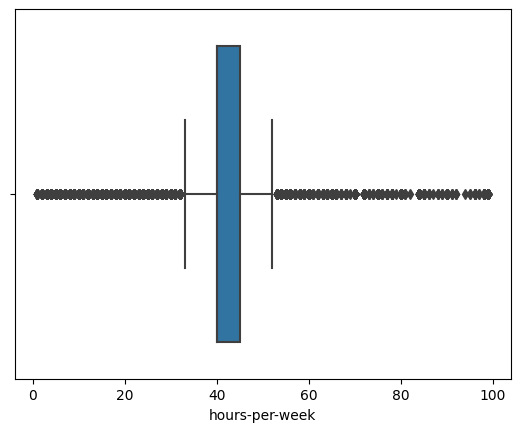

In [68]:
sns.boxplot(data=census_data,x='hours-per-week')

<Axes: xlabel='age'>

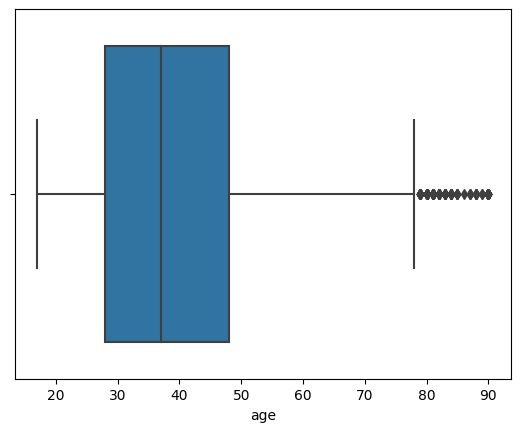

In [69]:
sns.boxplot(data=census_data,x='age')

In [70]:
#Encoding some columns
label_encoder = preprocessing.LabelEncoder()
census_data['above-50k']=label_encoder.fit_transform(census_data['above-50k'])
census_data['sex']=label_encoder.fit_transform(census_data['sex'])
#Removing outliers
index_hoursgr70 = census_data[census_data['hours-per-week'] > 70].index
census_data.drop(index_hoursgr70,inplace=True)

index_questionmark = census_data[census_data['workclass']=='?'].index
census_data.drop(index_questionmark,inplace=True)

index_questionmark_occuptn = census_data[census_data['occupation']=='?'].index
census_data.drop(index_questionmark_occuptn,inplace=True)

In [71]:
census_data['above-50k'].value_counts(normalize=True)

0   0.75
1   0.25
Name: above-50k, dtype: float64

In [72]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45299 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45299 non-null  int64 
 1   workclass       45299 non-null  object
 2   fnlwgt          45299 non-null  int64 
 3   education       45299 non-null  object
 4   education-num   45299 non-null  int64 
 5   marital-status  45299 non-null  object
 6   occupation      45299 non-null  object
 7   relationship    45299 non-null  object
 8   race            45299 non-null  object
 9   sex             45299 non-null  int64 
 10  capital-gain    45299 non-null  int64 
 11  capital-loss    45299 non-null  int64 
 12  hours-per-week  45299 non-null  int64 
 13  native-country  45299 non-null  object
 14  above-50k       45299 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.5+ MB


In [73]:
feature_columns=census_data.columns
feature_columns=feature_columns.drop(['above-50k','education','native-country'])

In [74]:
X=pd.get_dummies(census_data[feature_columns])
y=census_data[['above-50k']]

In [77]:
y.shape

(45299, 1)

In [78]:
%%time 

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

algo = LogisticRegression(max_iter=500)

cv_results = cross_validate(estimator= algo, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)

CPU times: user 127 ms, sys: 111 ms, total: 239 ms
Wall time: 7.04 s


In [79]:
cv_results
#Data is imbalanced as Class 0 is nearly 76 %. As data is imbalanced, we can't rely on both accuracy, auc, hence we need to see f1 here, it is 50%. We need to improve this. 

{'fit_time': array([1.22806716, 1.13528705, 1.81950808, 1.09144688, 1.08577108]),
 'score_time': array([0.17459226, 0.11747622, 0.15505362, 0.11629581, 0.07570291]),
 'estimator': [LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500)],
 'test_accuracy': array([0.7915011 , 0.79304636, 0.79161148, 0.79536424, 0.79169886]),
 'train_accuracy': array([0.79304065, 0.79290267, 0.79312343, 0.79204724, 0.79343267]),
 'test_precision': array([0.70344009, 0.71326165, 0.70623501, 0.72803851, 0.70858525]),
 'train_precision': array([0.71283884, 0.71484611, 0.71071218, 0.71402214, 0.71505216]),
 'test_recall': array([0.265681  , 0.26747312, 0.26388889, 0.27093596, 0.2625448 ]),
 'train_recall': array([0.26800314, 0.26531526, 0.27046702, 0.26008065, 0.2686751 ]),
 'test_f1': array([0.38569106, 0.38905181, 0.38421396, 0.39490862, 0.38313174]),
 'train_f1': array([0.38954908, 0.38

In [80]:
%%time 

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier()

cv_results = cross_validate(estimator= algo, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)

CPU times: user 79.9 ms, sys: 19.2 ms, total: 99.1 ms
Wall time: 3.22 s


In [81]:
cv_results

{'fit_time': array([0.62280273, 0.63340735, 0.72353721, 1.00504899, 0.66791344]),
 'score_time': array([0.10495877, 0.10219932, 0.15807152, 0.14550734, 0.07134271]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_accuracy': array([0.81136865, 0.81423841, 0.82030905, 0.80739514, 0.80472458]),
 'train_accuracy': array([0.99988962, 0.99991722, 0.99988962, 0.99991722, 0.99991722]),
 'test_precision': array([0.61374511, 0.61960784, 0.63386525, 0.60382979, 0.59956989]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.63216846, 0.63709677, 0.640681  , 0.63546798, 0.62455197]),
 'train_recall': array([0.99955202, 0.99966402, 0.99955202, 0.99966398, 0.99966402]),
 'test_f1': array([0.62282057, 0.62823062, 0.6372549 , 0.61924504, 0.61180601]),
 'train_f1': array([0.99977596, 0.99983198, 0.99977596, 0.99983196, 0.99983198]),
 'test_roc_auc': array([0.75144763

In [82]:
for model in cv_results['estimator']:
    for name, importance in zip(X.columns, model.feature_importances_):
      print(name, importance)

age 0.11521136886862889
fnlwgt 0.20061743057823098
education-num 0.12409080201790079
sex 0.004790268015482529
capital-gain 0.10659320426988123
capital-loss 0.03958401789934561
hours-per-week 0.061646219627652786
workclass_Federal-gov 0.004669795424600383
workclass_Local-gov 0.006005316877558409
workclass_Private 0.009354867289840729
workclass_Self-emp-inc 0.006775721613429348
workclass_Self-emp-not-inc 0.0075875908527781
workclass_State-gov 0.003952924907463672
workclass_Without-pay 0.00011261775147264783
marital-status_Divorced 0.0016458933790059744
marital-status_Married-AF-spouse 0.00030262705574365267
marital-status_Married-civ-spouse 0.20040547842322434
marital-status_Married-spouse-absent 0.0007653281423100785
marital-status_Never-married 0.002637763931187065
marital-status_Separated 0.0010477694686672563
marital-status_Widowed 0.0010791652002733007
occupation_Adm-clerical 0.004800015264348544
occupation_Armed-Forces 0.00017343133726787762
occupation_Craft-repair 0.00904072048350

In [83]:
%%time 

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

algo = RandomForestClassifier()

cv_results = cross_validate(estimator= algo, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)

CPU times: user 924 ms, sys: 1.62 s, total: 2.54 s
Wall time: 41 s


In [84]:
cv_results

{'fit_time': array([10.21367359,  9.7827065 , 10.64959478, 10.37700582,  6.49975348]),
 'score_time': array([0.89436746, 0.866081  , 0.91375375, 0.88306236, 0.76280713]),
 'estimator': [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 'test_accuracy': array([0.85408389, 0.85011038, 0.85960265, 0.85      , 0.85163925]),
 'train_accuracy': array([0.99983443, 0.99988962, 0.99988962, 0.99983443, 0.99988962]),
 'test_precision': array([0.74515086, 0.72572314, 0.75559105, 0.7254902 , 0.73492063]),
 'train_precision': array([0.99977596, 0.99988798, 0.99966409, 1.        , 0.99977601]),
 'test_recall': array([0.61962366, 0.62948029, 0.63575269, 0.62964622, 0.62231183]),
 'train_recall': array([0.99955202, 0.99966402, 0.99988801, 0.99932796, 0.99977601]),
 'test_f1': array([0.67661448, 0.67418426, 0.69051095, 0.67417885, 0.67394469]),
 'train_f1': array([0.99966398, 0.99977599, 0.99977604, 0.99966387, 0.9